# Downloading Fastai and Other Requirements

In [1]:
!pip install fastai==0.7.0
# !pip install kaggle
# !pip install -U -q PyDrive

     |████████████████████████████████| 122kB 3.5MB/s 
     |████████████████████████████████| 1.5MB 10.8MB/s 
     |████████████████████████████████| 496.4MB 47kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2655977 sha256=f92890709e32513af2e7aad144f4949349ed775a14a4766a0ab8f33fdf96f992
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.4.1+cu100 has requirement torch==1.3.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.3.0+cu100
    Uninstalling torch-1.3.0+cu100:
      Successfully uninstalled torch-1.3.0+cu100
  Found existing installation: fastai 1.0.58
    Uninstalling fastai-1.0.58:
      Successfully uninstalled fastai-1.0.58


# Importing Colab Related Packages

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn import preprocessing 
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
from google.colab import files
import zipfile
import shutil

# FastAi Related Packages

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from IPython.display import display

from sklearn import metrics

# Helper Functions

In [0]:
def mount_drive():
  from google.colab import drive
  drive.mount('/content/gdrive')
def downloadDatasetFromKaggle():
  #first upload kaggle.json
  files.upload()

  #before importing the dataset we want to use this code
  # The Kaggle API client expects this file to be in ~/.kaggle,
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/

  # This permissions change avoids a warning on Kaggle tool startup.
  !chmod 600 ~/.kaggle/kaggle.json


  !kaggle competitions download -c bluebook-for-bulldozers

def unzip(path_of_file , path_to_extract):
  with zipfile.ZipFile(path_of_file , 'r') as zip:
    zip.extractall(path_to_extract)

def moveFile(move_from , move_to):
  shutil.move(move_from , move_to)

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m,X_train,X_valid):
  res = [rmse(m.predict(X_train),y_train), rmse(m.predict(X_valid), y_valid)
          , m.score(X_train,y_train), m.score(X_valid, y_valid)]

  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)

  print(res)

def split_vals(a, n): return a[:n].copy(), a[n:].copy()

In [0]:
def df_type(df , limit=None):
  if limit == None:
    limit = df.shape[1]
  columns = df.columns
  df_type = pd.DataFrame(columns=("Feature","dtype"))

  for index,col in enumerate(columns):
    col_type = df[col].dtype
    df_type = df_type.append({"Feature":col, "dtype":col_type}, ignore_index=True)

    if(limit == index+1):
      return df_type
      

In [8]:
mount_drive()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Main Code Starts

In [0]:
PATH = "/content/gdrive/My Drive/fastai/"

In [0]:
?pd.read_csv

## Read Data

In [0]:
## We can give dtype manually to read_csv to make it take less memory

In [0]:
df_initial = pd.read_csv(f'{PATH}data/Train.csv',low_memory=False,parse_dates=['saledate'])

In [12]:
df_initial.head() #or display()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_initial.shape

(401125, 53)

In [14]:
col_type = df_type(df_initial, limit=5)
col_type

,Feature,dtype
0,SalesID,int64
1,SalePrice,int64
2,MachineID,int64
3,ModelID,int64
4,datasource,int64


## Change Data into its Log

In [0]:
df_initial.SalePrice = np.log(df_initial.SalePrice)

In [16]:
df_initial.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
5        2008-12-18
6        2004-08-26
7        2005-11-17
8        2009-08-27
9        2007-08-09
10       2008-08-21
11       2006-08-24
12       2005-10-20
13       2006-01-26
14       2006-01-03
15       2006-11-16
16       2007-06-14
17       2010-01-28
18       2006-03-09
19       2005-11-17
20       2006-05-18
21       2006-10-19
22       2007-10-25
23       2006-10-19
24       2004-05-20
25       2006-03-09
26       2006-03-09
27       2007-02-22
28       2007-08-09
29       2006-06-01
            ...    
401095   2011-12-14
401096   2011-09-15
401097   2011-10-28
401098   2011-08-16
401099   2011-12-14
401100   2011-08-16
401101   2011-12-14
401102   2011-08-16
401103   2011-09-15
401104   2011-08-16
401105   2011-10-25
401106   2011-08-16
401107   2011-09-15
401108   2011-08-16
401109   2011-08-16
401110   2011-09-15
401111   2011-10-25
401112   2011-10-25
401113   2011-10-25


## Add Data Related Columns using add_datepart()

In [17]:
add_datepart(df_initial, 'saledate')
df_initial.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [18]:
df_initial.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [0]:
?train_cats

## Change String Columns into Catetorial Columns

In [0]:
train_cats(df_initial)

In [22]:
for col in df_initial.columns:
  try:
    print(col," : ", df_initial[col].cat.categories)
    print("\n\n")
    print("----------------------------------------------------------------------------------------------")
  except:
    print(col , " is a Numeric Col")



SalesID  is a Numeric Col
SalePrice  is a Numeric Col
MachineID  is a Numeric Col
ModelID  is a Numeric Col
datasource  is a Numeric Col
auctioneerID  is a Numeric Col
YearMade  is a Numeric Col
MachineHoursCurrentMeter  is a Numeric Col
UsageBand  :  Index(['High', 'Low', 'Medium'], dtype='object')



----------------------------------------------------------------------------------------------
fiModelDesc  :  Index(['100C', '104', '1066', '1066E', '1080', '1080B', '1088', '1088CK',
       '1088LT', '1088TTL',
       ...
       'ZX600LC', 'ZX70', 'ZX75', 'ZX75US', 'ZX75USA', 'ZX80', 'ZX800',
       'ZX800LC', 'ZX80LCK', 'ZX850H'],
      dtype='object', length=4999)



----------------------------------------------------------------------------------------------
fiBaseModel  :  Index(['10', '100', '104', '1066', '1080', '1088', '10DG', '11', '110', '1105',
       ...
       'ZX370', 'ZX450', 'ZX460', 'ZX50', 'ZX600', 'ZX70', 'ZX75', 'ZX80',
       'ZX800', 'ZX850'],
      dtype='object

### Change order of Category in UsageBand Columns

In [0]:
df_initial.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

#### Print % of emptyness of each Columns

In [25]:
df_initial.isnull().sum().sort_index()/len(df_initial)

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

## Save Data in Feather Form

In [0]:
os.makedirs(f'{PATH}tmp' , exist_ok=True)
df_initial.to_feather(f'{PATH}tmp/raw')

## Load Data from Feather form

In [0]:
loaded_initial_df = pd.read_feather(f'{PATH}tmp/raw')

In [29]:
loaded_initial_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


## Filling the na values

In [0]:
?proc_df

In [0]:
processed_df, y, nas = proc_df(loaded_initial_df, 'SalePrice')

In [32]:
nas

{'MachineHoursCurrentMeter': 0.0, 'auctioneerID': 2.0}

In [33]:
processed_df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [34]:
processed_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,55,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,0,45,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,False,False


## Processing

In [35]:
RFRegressor = RandomForestRegressor(n_jobs=-1)
RFRegressor.fit(processed_df, y)
RFRegressor.score(processed_df, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9831061883595377

In [36]:
n_valid = 12000
n_train = len(processed_df) - n_valid
X_train_processed, X_valid_processed = split_vals(processed_df, n_train)
y_train, y_valid = split_vals(y, n_train)

X_train_processed.shape, y_train.shape, X_valid_processed.shape

((389125, 66), (389125,), (12000, 66))

In [39]:
 model = RandomForestRegressor(n_jobs= -1)
%time model.fit(X_train_processed, y_train)
print_score(model,X_train_processed,X_valid_processed)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 38s, sys: 130 ms, total: 1min 39s
Wall time: 51 s
[0.09064615451380914, 0.2529449417566117, 0.9828274972126567, 0.8857384865724173]


### Speeding things up

In [0]:
processed_df, y,_ = proc_df(loaded_initial_df, 'SalePrice', subset=30000) #Random Subset
X_train_processed, _ = split_vals(processed_df,20000)
y_train, _ = split_vals(y, 20000)

In [41]:
y_train.shape

(20000,)

In [42]:
X_train_processed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
8,1139272,1036251,36003,121,3.0,2008,302.0,3,779,250,62,0,0,5,17,44,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,1,19,29,3,2,1,0,0,0,0,0,2009,8,35,27,3,239,False,False,False,False,False,False,1251331200,False,False
45,1139423,999442,3217,121,3.0,2003,1788.0,1,1288,375,167,0,0,0,41,9,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2006,12,50,14,3,348,False,False,False,False,False,False,1166054400,False,False
46,1139424,1011821,4818,121,3.0,1000,5074.0,3,1424,412,15,0,0,0,33,15,2,2,1,3,0,0,0,0,6,0,1,3,3,1,5,1,2,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,11,46,18,3,322,False,False,False,False,False,False,1290038400,False,False
75,1139496,1053081,3282,121,3.0,2006,953.0,2,1903,642,0,0,0,6,11,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2007,10,42,18,3,291,False,False,False,False,False,False,1192665600,False,False
79,1139512,318203,4116,121,3.0,2002,7793.0,1,2196,696,57,0,0,0,54,51,5,5,0,6,0,0,0,0,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,0,0,2009,3,13,26,3,85,False,False,False,False,False,False,1238025600,False,False


In [43]:
processed_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
8,1139272,1036251,36003,121,3.0,2008,302.0,3,779,250,62,0,0,5,17,44,4,4,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,1,19,29,3,2,1,0,0,0,0,0,2009,8,35,27,3,239,False,False,False,False,False,False,1251331200,False,False
45,1139423,999442,3217,121,3.0,2003,1788.0,1,1288,375,167,0,0,0,41,9,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2006,12,50,14,3,348,False,False,False,False,False,False,1166054400,False,False
46,1139424,1011821,4818,121,3.0,1000,5074.0,3,1424,412,15,0,0,0,33,15,2,2,1,3,0,0,0,0,6,0,1,3,3,1,5,1,2,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,11,46,18,3,322,False,False,False,False,False,False,1290038400,False,False
75,1139496,1053081,3282,121,3.0,2006,953.0,2,1903,642,0,0,0,6,11,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,3,0,0,0,2,19,29,3,2,1,0,0,0,0,0,2007,10,42,18,3,291,False,False,False,False,False,False,1192665600,False,False
79,1139512,318203,4116,121,3.0,2002,7793.0,1,2196,696,57,0,0,0,54,51,5,5,0,6,0,0,0,0,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,0,0,2009,3,13,26,3,85,False,False,False,False,False,False,1238025600,False,False


In [44]:
X_train_processed.shape,y_train.shape

((20000, 66), (20000,))

In [45]:
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train_processed, y_train)
print_score(model , X_train_processed,X_valid_processed)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.99 s, sys: 15 ms, total: 4 s
Wall time: 2.18 s
[0.11374980493656985, 0.3506841092421928, 0.9714517717029648, 0.7803758226545168]


In [46]:
X_train_processed.shape

(20000, 66)

### Using Single Tree

In [48]:
model = RandomForestRegressor(n_estimators=1,max_depth=3, bootstrap=False, n_jobs=-1)
model.fit(X_train_processed,y_train)
print_score(model , X_train_processed,X_valid_processed)

[0.5215160102649986, 0.5792061263994237, 0.3999145025456855, 0.40087937906809534]


In [51]:
draw_tree(model.estimators_[0], processed_df, precision=3)

Output hidden; open in https://colab.research.google.com to view.

### Bagging

In [52]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11225078665863285, 0.3689325610324937, 0.9721992426969311, 0.7569240749174351]


In [53]:
preds = np.array([t.predict(X_valid_processed) for t in model.estimators_])
print(preds[:1]  , sep=" ") 
np.mean(preds[:1]) , y_valid[0]


[[10.08581  9.68034  8.9872  ...  9.43348  9.43348  9.43348]]


(9.928012027725618, 9.104979856318357)

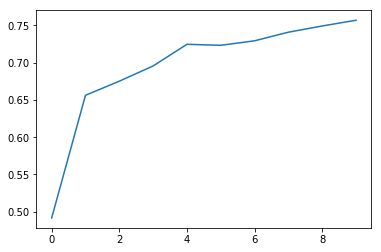

In [54]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1],axis=0)) for i in range(10)])

In [0]:
??metrics.r2_score

In [57]:
model = RandomForestRegressor(n_estimators=20, n_jobs=-1)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.10395044183048073, 0.3451412435523356, 0.976158667800795, 0.7872636551611057]


In [59]:
model = RandomForestRegressor(n_estimators=40, n_jobs=-1)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.0992772901969367, 0.34072535552160066, 0.9782540858654899, 0.7926725144145439]


In [60]:
model = RandomForestRegressor(n_estimators=20, n_jobs=-1 , oob_score=True)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[0.10384467300074589, 0.348078724151139, 0.976207159887431, 0.7836270676355575, 0.811084607985419]


## subsampling

In [0]:
processed_df, y,nas = proc_df(loaded_initial_df, 'SalePrice')
X_train_processed, X_valid_processed = split_vals(processed_df, n_train)
y_train, y_valid = split_vals(y, n_train)

In [0]:
??set_rf_samples

In [0]:
set_rf_samples(20000)

In [64]:
model = RandomForestRegressor(n_jobs=-1,oob_score=False)
%time model.fit(X_train_processed, y_train)
print_score(model,X_train_processed,X_valid_processed)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 8.65 s, sys: 114 ms, total: 8.77 s
Wall time: 5.16 s
[0.24185430830921031, 0.2779161245561618, 0.8777517974131579, 0.8620646871914497]


In [65]:
X_train_processed.shape,y_train.shape

((389125, 66), (389125,))

In [66]:
model = RandomForestRegressor(n_estimators=40, n_jobs=-1,oob_score=False)
%time model.fit(X_train_processed, y_train)
print_score(model,X_train_processed,X_valid_processed)

CPU times: user 31.2 s, sys: 107 ms, total: 31.3 s
Wall time: 16.7 s
[0.22753276276260445, 0.26238402280538453, 0.8918011346621099, 0.8770516381756281]


### Parameter Tuning


In [0]:
reset_rf_samples()

In [68]:
model = RandomForestRegressor(n_estimators=40,n_jobs=-1 , oob_score=True)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.07815889406567077, 0.24015724683685838, 0.9872329183100215, 0.8969994920758677, 0.9085122170972797]


In [69]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,n_jobs=-1 , oob_score=True)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.11499440022744807, 0.23432634173767744, 0.9723631710265259, 0.9019403815929792, 0.9085704499926324]


In [70]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,n_jobs=-1 , oob_score=True)
model.fit(X_train_processed,y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.11924073450769221, 0.22781732031442814, 0.9702844268545532, 0.9073124393876321, 0.9115291006319223]


In [0]:
??proc_df

In [0]:
###Keacture 3

### Set random Forent Sample Value to 50000 

In [0]:
set_rf_samples(50000)

In [72]:
model = RandomForestRegressor(n_estimators=40
                              , min_samples_leaf=3
                              , max_features=0.5
                              , n_jobs=-1
                              ,oob_score=True)
model.fit(X_train_processed, y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.20573835766597046, 0.24712443302957432, 0.9115362462904076, 0.8909365213047349, 0.8945184417687435]


In [73]:
## Slow 

%time preds = np.array([t.predict(X_valid_processed) for t in model.estimators_])
np.mean(preds[:,0]) , np.std(preds[:,0])

CPU times: user 1.41 s, sys: 7 ms, total: 1.42 s
Wall time: 1.42 s


(9.248617906210555, 0.3634967293037884)

In [0]:
??parallel_trees

In [0]:
## Fast Version

def get_preds(t): return t.predict(X_valid_processed)
%time preds = np.array(parallel_trees(model, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

In [0]:
X_train_loaded, X_valid_loaded = split_vals(loaded_initial_df, n_train)

In [75]:
X_train_loaded.shape

(389125, 65)

In [76]:
loaded_initial_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [77]:
loaded_initial_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


### Data Analysis

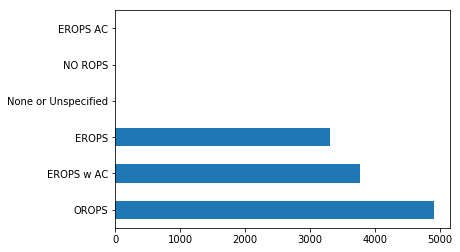

In [78]:
x = X_valid_loaded.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh()

In [79]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure' , as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.838981,0.273203
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.577183,0.261467
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.685085,0.220344


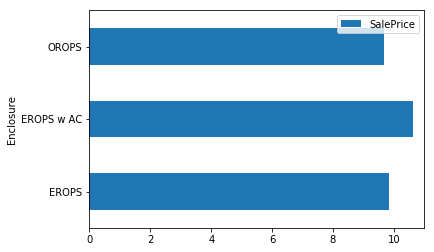

In [80]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh' , xlim=(0,11))

In [81]:
enc_summ[~pd.isnull(enc_summ.SalePrice)]

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.838981,0.273203
2,EROPS w AC,10.623971,10.577183,0.261467
5,OROPS,9.682064,9.685085,0.220344


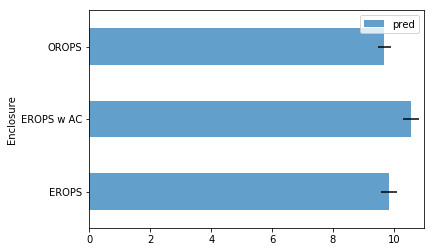

In [82]:
enc_summ.plot('Enclosure' 
               ,'pred'
               ,'barh'
               ,xerr='pred_std'
               ,alpha=0.7
              ,xlim=(0,11))

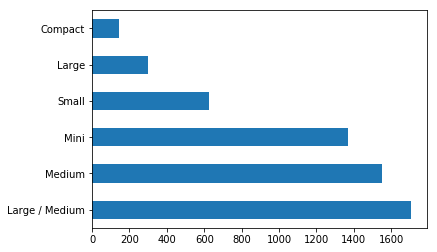

In [83]:
X_valid_loaded.ProductSize.value_counts().plot.barh()

In [84]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby('ProductSize').mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.857715,0.354391
Large,10.470589,10.393478,0.352173
Large / Medium,10.691871,10.650951,0.292381
Medium,10.681511,10.623279,0.282947
Mini,9.535147,9.558095,0.247808
Small,10.324448,10.311080,0.313854


In [85]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.035951
Large             0.033884
Small             0.030439
Large / Medium    0.027451
Medium            0.026635
Mini              0.025926
dtype: float64

## Feature Importance

In [86]:
fi = rf_feat_importance(model, processed_df); fi[:10]

,cols,imp
5,YearMade,0.171790
37,Coupler_System,0.106419
13,ProductSize,0.097231
14,fiProductClassDesc,0.071570
2,ModelID,0.059210
63,saleElapsed,0.049754
38,Grouser_Tracks,0.044420
10,fiSecondaryDesc,0.042619
19,Enclosure,0.040680
39,Hydraulics_Flow,0.036243


In [0]:
def plot_fi(fi): return fi.plot('cols'
                                ,'imp'
                                ,'barh'
                                ,figsize=(12,7)
                                ,legend=False
                                )

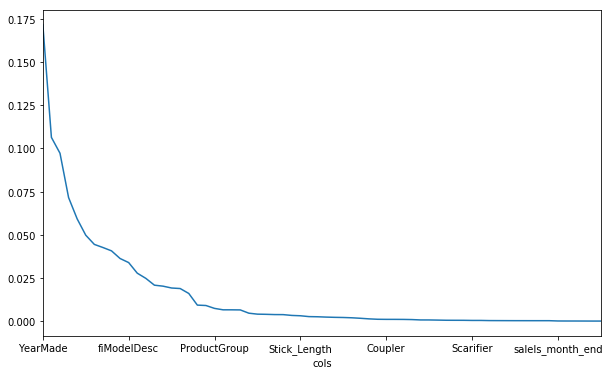

In [88]:
fi.plot('cols', 'imp' , figsize=(10,6) ,legend=False)

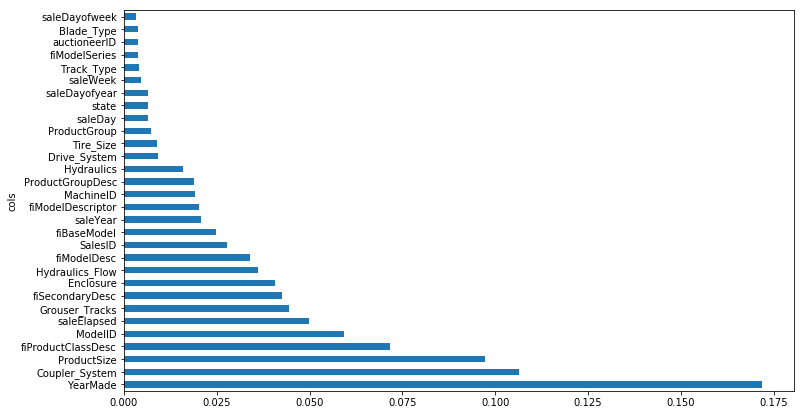

In [89]:
fi[:30].plot('cols','imp', 'barh', figsize=(12,7), legend=False)

In [90]:
to_keep = fi[fi.imp > 0.005].cols; len(to_keep)

24

In [0]:
processed_df_keep = processed_df[to_keep].copy()
X_train_processed, X_valid_processed = split_vals(processed_df_keep, n_train)

In [93]:
model = RandomForestRegressor(n_estimators=40
                              ,min_samples_leaf=3
                              ,max_features=0.5
                              ,n_jobs=-1
                              ,oob_score=True
                              )
model.fit(X_train_processed, y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.2069092990786617, 0.24569773499341355, 0.9105264137169208, 0.8921921761371099, 0.894123142349577]


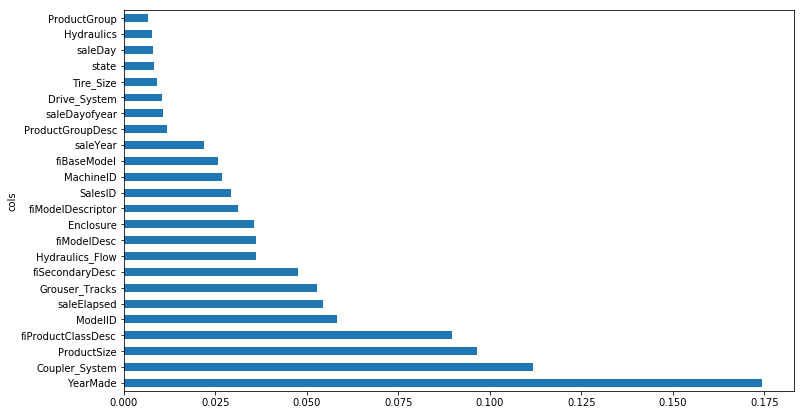

In [94]:
fi = rf_feat_importance(model, processed_df_keep)
plot_fi(fi)

In [95]:
processed_df_keep.shape

(401125, 24)

## One Hot Encoding

In [97]:
### Is not Useful in This Case

df_processed, y, nas = proc_df(loaded_initial_df, 'SalePrice', max_n_cat=7)
X_train_processed, X_valid_processed = split_vals(df_processed, n_train)

model = RandomForestRegressor(n_estimators=40
                              ,min_samples_leaf=3
                              ,max_features=0.6
                              ,n_jobs=-1
                              ,oob_score=True
                              )
model.fit(X_train_processed, y_train)
print_score(model,X_train_processed,X_valid_processed)

[0.20703184497194063, 0.2534798525252414, 0.9104203975290999, 0.8852547106213691, 0.8928080201805078]


In [98]:
df_processed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na,UsageBand_High,UsageBand_Medium,UsageBand_Low,UsageBand_nan,ProductSize_Compact,...,Hydraulics_Flow_None or Unspecified,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Track_Type_Rubber,Track_Type_Steel,Track_Type_nan,Thumb_Hydraulic,Thumb_Manual,Thumb_None or Unspecified,Thumb_nan,Pattern_Changer_No,Pattern_Changer_None or Unspecified,Pattern_Changer_Yes,Pattern_Changer_nan,Grouser_Type_Double,Grouser_Type_Single,Grouser_Type_Triple,Grouser_Type_nan,Backhoe_Mounting_None or Unspecified,Backhoe_Mounting_Yes,Backhoe_Mounting_nan,Travel_Controls_1 Speed,Travel_Controls_2 Pedal,Travel_Controls_Differential Steer,Travel_Controls_Finger Tip,Travel_Controls_Lever,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Travel_Controls_nan,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Differential_Type_nan,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel,Steering_Controls_nan
0,1139246,999089,3157,121,3.0,2004,68.0,950,296,41,0,0,59,1,0,1,17,0,0,0,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,False,False,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1139248,117657,77,121,3.0,1996,4640.0,1725,527,55,98,0,62,33,0,1,12,0,0,0,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,False,False,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,1139249,434808,7009,121,3.0,2001,2838.0,331,110,0,0,0,39,32,0,4,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,False,False,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1139251,1026470,332,121,3.0,2001,3486.0,3674,1375,0,45,0,8,44,0,1,0,0,0,0,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,False,False,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1139253,1057373,17311,121,3.0,2007,722.0,4208,1529,0,0,0,40,32,0,4,0,0,0,0,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,False,False,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


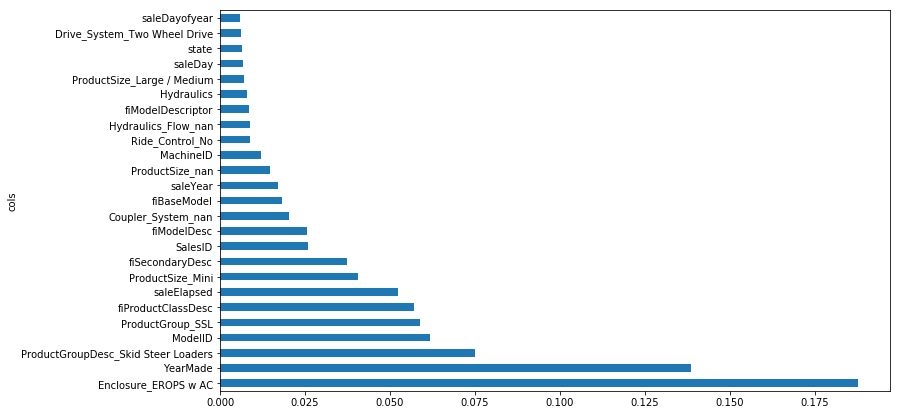

In [99]:
fi = rf_feat_importance(model, df_processed)
plot_fi(fi[:25])

#### Hierarchical Clustring

In [0]:
from scipy.cluster import hierarchy as hc

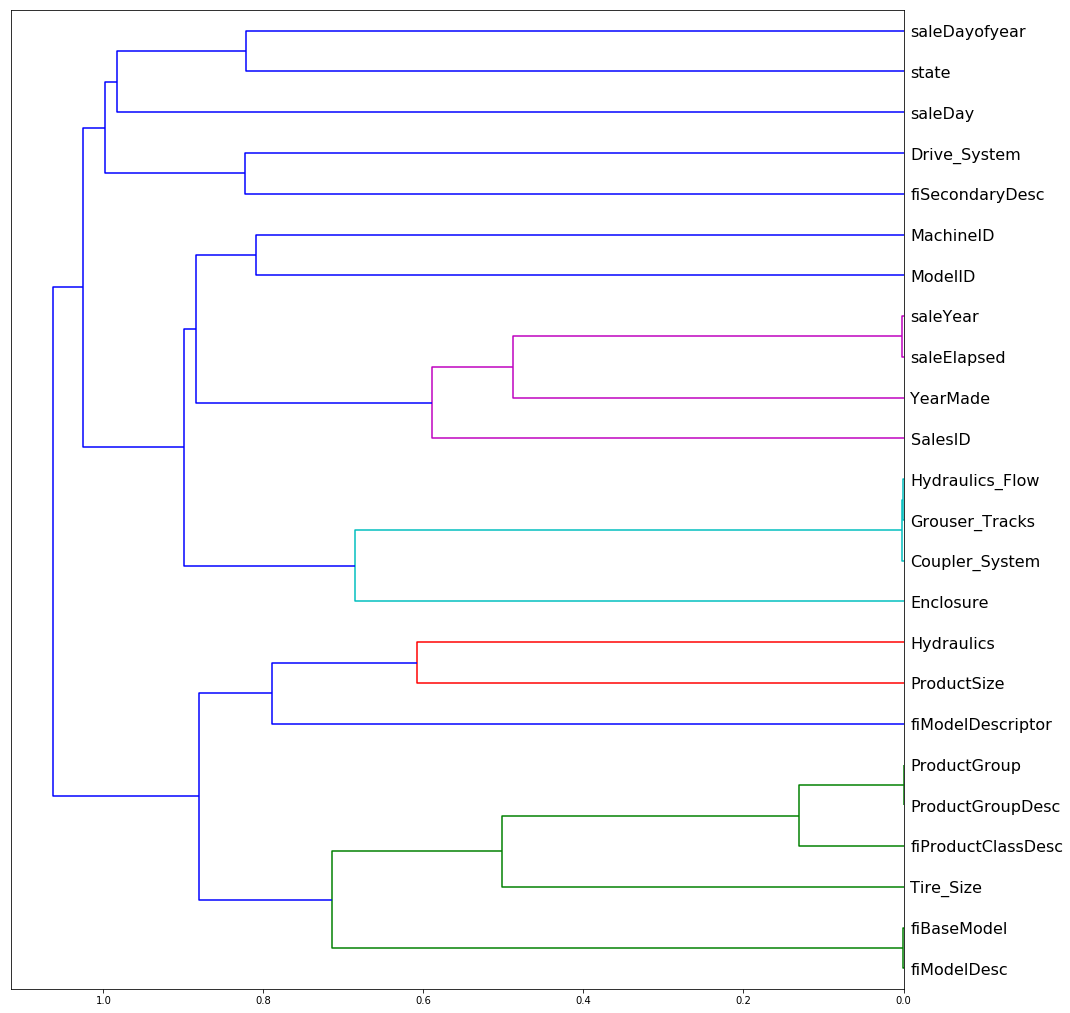

In [102]:
### Just Copied Code not UnderStanded and Remember This Diagram will always shows different Results
corr = np.round(scipy.stats.spearmanr(processed_df_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,18))
dendrogram = hc.dendrogram(z, labels=processed_df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [0]:
def get_oob(df):
  model = RandomForestRegressor(n_estimators=30
                                ,min_samples_leaf=5
                                ,max_features=0.6
                                ,n_jobs=-1
                                ,oob_score=True
                                )
  x, _ = split_vals(df, n_train)
  model.fit(x,y_train)
  return model.oob_score_

In [104]:
processed_df_keep.shape

(401125, 24)

In [105]:
## Columns may chages
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel' ,'Grouser_Tracks' , 'Coupler_System','Hydraulics_Flow'):
  print(c, get_oob(processed_df_keep.drop(c,axis=1)))

saleYear 0.8894629772812769
saleElapsed 0.8864407822784032
fiModelDesc 0.8890752849519457
fiBaseModel 0.8892587708643926
Grouser_Tracks 0.8902272744729538
Coupler_System 0.8899780649845257
Hydraulics_Flow 0.8903980604807733




---



In [106]:
to_drop = ['saleYear','fiModelDesc','Grouser_Tracks']
get_oob(processed_df_keep.drop(to_drop,axis=1))

0.8883494189759695

In [107]:
processed_df_keep.shape

(401125, 24)

In [0]:
processed_df_keep.drop(to_drop,axis=1,inplace=True)
X_train_processed_keep, X_valid_processed_keep = split_vals(processed_df_keep, n_train)

In [109]:
X_train_processed_keep.shape

(389125, 21)

In [0]:
np.save(f'{PATH}tmp/keep_cols.npy',np.array(processed_df_keep.columns))

In [0]:
keep_cols = np.load(f'{PATH}/tmp/keep_cols.npy' , allow_pickle=True)

In [112]:
keep_cols

array(['YearMade', 'Coupler_System', 'ProductSize', 'fiProductClassDesc', 'ModelID', 'saleElapsed',
       'fiSecondaryDesc', 'Enclosure', 'Hydraulics_Flow', 'SalesID', 'fiBaseModel', 'fiModelDescriptor',
       'MachineID', 'ProductGroupDesc', 'Hydraulics', 'Drive_System', 'Tire_Size', 'ProductGroup', 'saleDay',
       'state', 'saleDayofyear'], dtype=object)

In [113]:
processed_df_keep = processed_df_keep[keep_cols]
X_train_keep, X_valid_keep = split_vals(processed_df_keep, n_train)

model = RandomForestRegressor(n_estimators=40
                              ,min_samples_leaf=3
                              ,n_jobs=-1
                              ,max_features=0.6
                              ,oob_score=True)

model.fit(X_train_keep,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [114]:
print_score(model,X_train_keep,X_valid_keep)

[0.20798369391089072, 0.24717703839372387, 0.9095948022252345, 0.8908900836895323, 0.8927137715128882]




```
`# This is formatted as code`
```

## Tree Interpreter

In [115]:
!pip install treeinterpreter

In [0]:
from treeinterpreter import treeinterpreter as ti

In [117]:
row = X_valid_keep.values[None, 0]; row

array([[      1999,          0,          5,         17,        665, 1284595200,          0,          1,
                 0,    4364751,       1111,          0,    2300944,          4,         12,          0,
                 0,          4,         16,         35,        259]])

In [0]:
prediction, bias, contributions = ti.predict(model, row)

In [119]:
prediction.shape, bias.shape, contributions.shape

((1, 1), (1,), (1, 21))

In [0]:
idxs = np.argsort(contributions[0])

In [121]:
[o for o in zip(X_valid_keep.columns[idxs],X_valid_keep.iloc[0][idxs],contributions[0][idxs])]

[('ProductSize', 5, -0.5999417546374926),
 ('fiProductClassDesc', 17, -0.0871500618172663),
 ('saleElapsed', 1284595200, -0.0817630137840633),
 ('Enclosure', 1, -0.07659613834203052),
 ('SalesID', 4364751, -0.0563845603672295),
 ('MachineID', 2300944, -0.055752349426245164),
 ('fiBaseModel', 1111, -0.04453110397177107),
 ('ModelID', 665, -0.02683166158685659),
 ('fiModelDescriptor', 0, -0.022154609417291395),
 ('Tire_Size', 0, -0.010777118887942505),
 ('state', 35, -0.0069801895941747905),
 ('fiSecondaryDesc', 0, -0.004071906468068898),
 ('ProductGroup', 4, -0.003783900392978934),
 ('saleDay', 16, 0.0004280047947467835),
 ('saleDayofyear', 259, 0.0017939159309016794),
 ('Drive_System', 0, 0.0024337070818146954),
 ('ProductGroupDesc', 4, 0.01214883667055231),
 ('Hydraulics', 12, 0.01751983794408827),
 ('Hydraulics_Flow', 0, 0.018346540079015972),
 ('YearMade', 1999, 0.04642205714972536),
 ('Coupler_System', 0, 0.07361836826471886)]

In [122]:
processed_df_keep.shape

(401125, 21)

## Extrapolation

In [123]:
df_ext = processed_df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_train] = 0

x,y,nas = proc_df(df_ext,'is_valid')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
model = RandomForestClassifier(n_estimators=40
                               ,min_samples_leaf=3
                               ,max_features=0.5
                               ,n_jobs=-1
                               ,oob_score=True
                               )

model.fit(x,y)
model.oob_score_

0.9999900280461202

In [127]:
fi = rf_feat_importance(model,x);fi[:10]

,cols,imp
9,SalesID,0.829259
5,saleElapsed,0.115301
12,MachineID,0.047389
0,YearMade,0.001991
10,fiBaseModel,0.001514
20,saleDayofyear,0.001121
1,Coupler_System,0.000806
4,ModelID,0.000704
14,Hydraulics,0.000667
8,Hydraulics_Flow,0.000565


In [0]:
feats=['SalesID','saleElapsed','MachineID']

In [0]:
x.drop(feats, axis=1, inplace=True)

In [134]:
model = RandomForestClassifier(n_estimators=40
                               ,min_samples_leaf=3
                               ,max_features=0.5
                               ,n_jobs=-1
                               ,oob_score=True
                               )
model.fit(x,y)
model.oob_score_

0.9736291679650981

In [136]:
fi = rf_feat_importance(model,x);fi[:10]

,cols,imp
17,saleDayofyear,0.225442
16,state,0.125204
4,ModelID,0.124033
15,saleDay,0.114570
0,YearMade,0.105516
8,fiBaseModel,0.094047
3,fiProductClassDesc,0.047704
5,fiSecondaryDesc,0.032970
11,Hydraulics,0.026923
6,Enclosure,0.024448


In [0]:
set_rf_samples(50000)

In [0]:
feats=['SalesID','saleElapsed','MachineID','saleDayofyear','state','ModelID','saleDay','YearMade']

In [152]:
X_train_processed, X_valid_processed = split_vals(processed_df_keep,n_train)
model = RandomForestRegressor(n_estimators=40
                               ,min_samples_leaf=3
                               ,max_features=0.5
                               ,n_jobs=-1
                               ,oob_score=True
                               )
model.fit(X_train_processed,y_train)

print_score(model,X_train_processed,X_valid_processed)

[0.2095994681766245, 0.2479813774787972, 0.9081846743700779, 0.8901788188971649, 0.8916543698868474]


In [155]:
for f in feats:
  df_subs = processed_df_keep.drop(f,axis=1)
  X_train_ , X_valid_ = split_vals(df_subs,n_train)

  model = RandomForestRegressor(n_estimators=40
                                ,min_samples_leaf=3
                                ,max_features=0.6
                                ,n_jobs=-1
                                ,oob_score=True
                                )
  model.fit(X_train_,y_train)
  print(f)
  print_score(model,X_train_,X_valid_)  

SalesID
[0.20828729662216267, 0.24209905649328156, 0.9093306729022655, 0.8953271214022213, 0.8928238624686622]
saleElapsed
[0.25967020683677156, 0.25346286679732455, 0.8590779105499605, 0.8852700883087334, 0.8332558413832272]
MachineID
[0.20707243638530842, 0.24627448226853893, 0.9103852674829629, 0.8916854490697055, 0.8941760258617114]
saleDayofyear
[0.20770194986064816, 0.24306584110246596, 0.9098395702062193, 0.8944894627601061, 0.8933948817030611]
state
[0.20798531576623208, 0.2488618496212996, 0.9095933922615799, 0.8893975816020294, 0.8929691018062653]
ModelID
[0.20932555171704767, 0.25052593657505134, 0.9084244964994447, 0.8879134859041511, 0.8913203134755788]
saleDay
[0.20749935988239215, 0.2450384768261225, 0.9100153672220965, 0.8927699416285328, 0.8935985508811678]
YearMade
[0.23040891315347797, 0.29160733899917923, 0.8890484492179653, 0.8481394831369959, 0.8685634207472729]


In [0]:
reset_rf_samples()

In [158]:
df_subs = processed_df_keep.drop(['SalesID', 'MachineID','saleDayofyear','saleDay'],axis=1)

X_train_,X_valid_ = split_vals(processed_df_keep,n_train)
model = RandomForestRegressor(n_estimators=40
                              ,min_samples_leaf=3
                              ,max_features=0.6
                              ,n_jobs=-1
                              ,oob_score=True
                              )
model.fit(X_train_,y_train)
print(f)
print_score(model,X_train_,X_valid_)  

YearMade
[0.12344537491368271, 0.22933504385760803, 0.968151830782317, 0.9060733529168022, 0.9083644580658448]


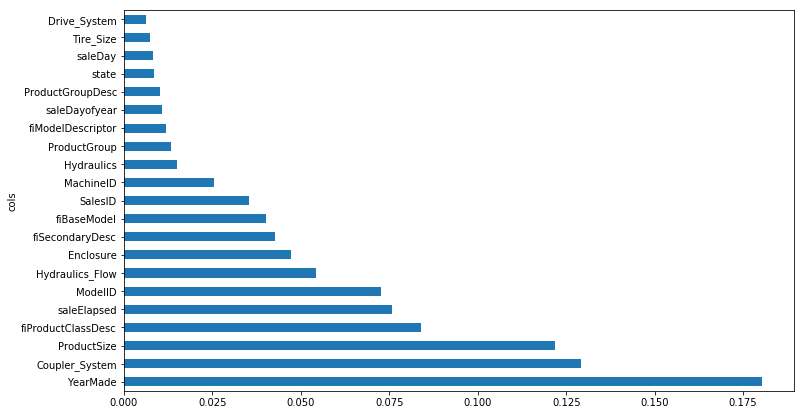

In [159]:
plot_fi(rf_feat_importance(model,X_train_))

In [0]:
np.save(f'{PATH}/tmp/subs_cols.npy' , np.array(df_subs.columns))

## Final Model

In [161]:
model = RandomForestRegressor(n_estimators=160
                                ,min_samples_leaf=3
                                ,max_features=0.6
                                ,n_jobs=-1
                                ,oob_score=True
                                )
model.fit(X_train_,y_train)
print_score(model,X_train_,X_valid_)  

[0.12120947855646555, 0.22481481508028006, 0.9692950784661732, 0.9097394804905503, 0.913177710104481]
